In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import folium

pd.set_option('display.max_columns', None)

In [76]:
df = pd.read_csv('../data/raw/PakistanClean.csv').sort_values(by='gname')
df['gname'].replace('Unknown', np.NaN, inplace=True)

Axes(0.125,0.11;0.698618x0.77)
Axes(0.125,0.11;0.698618x0.77)


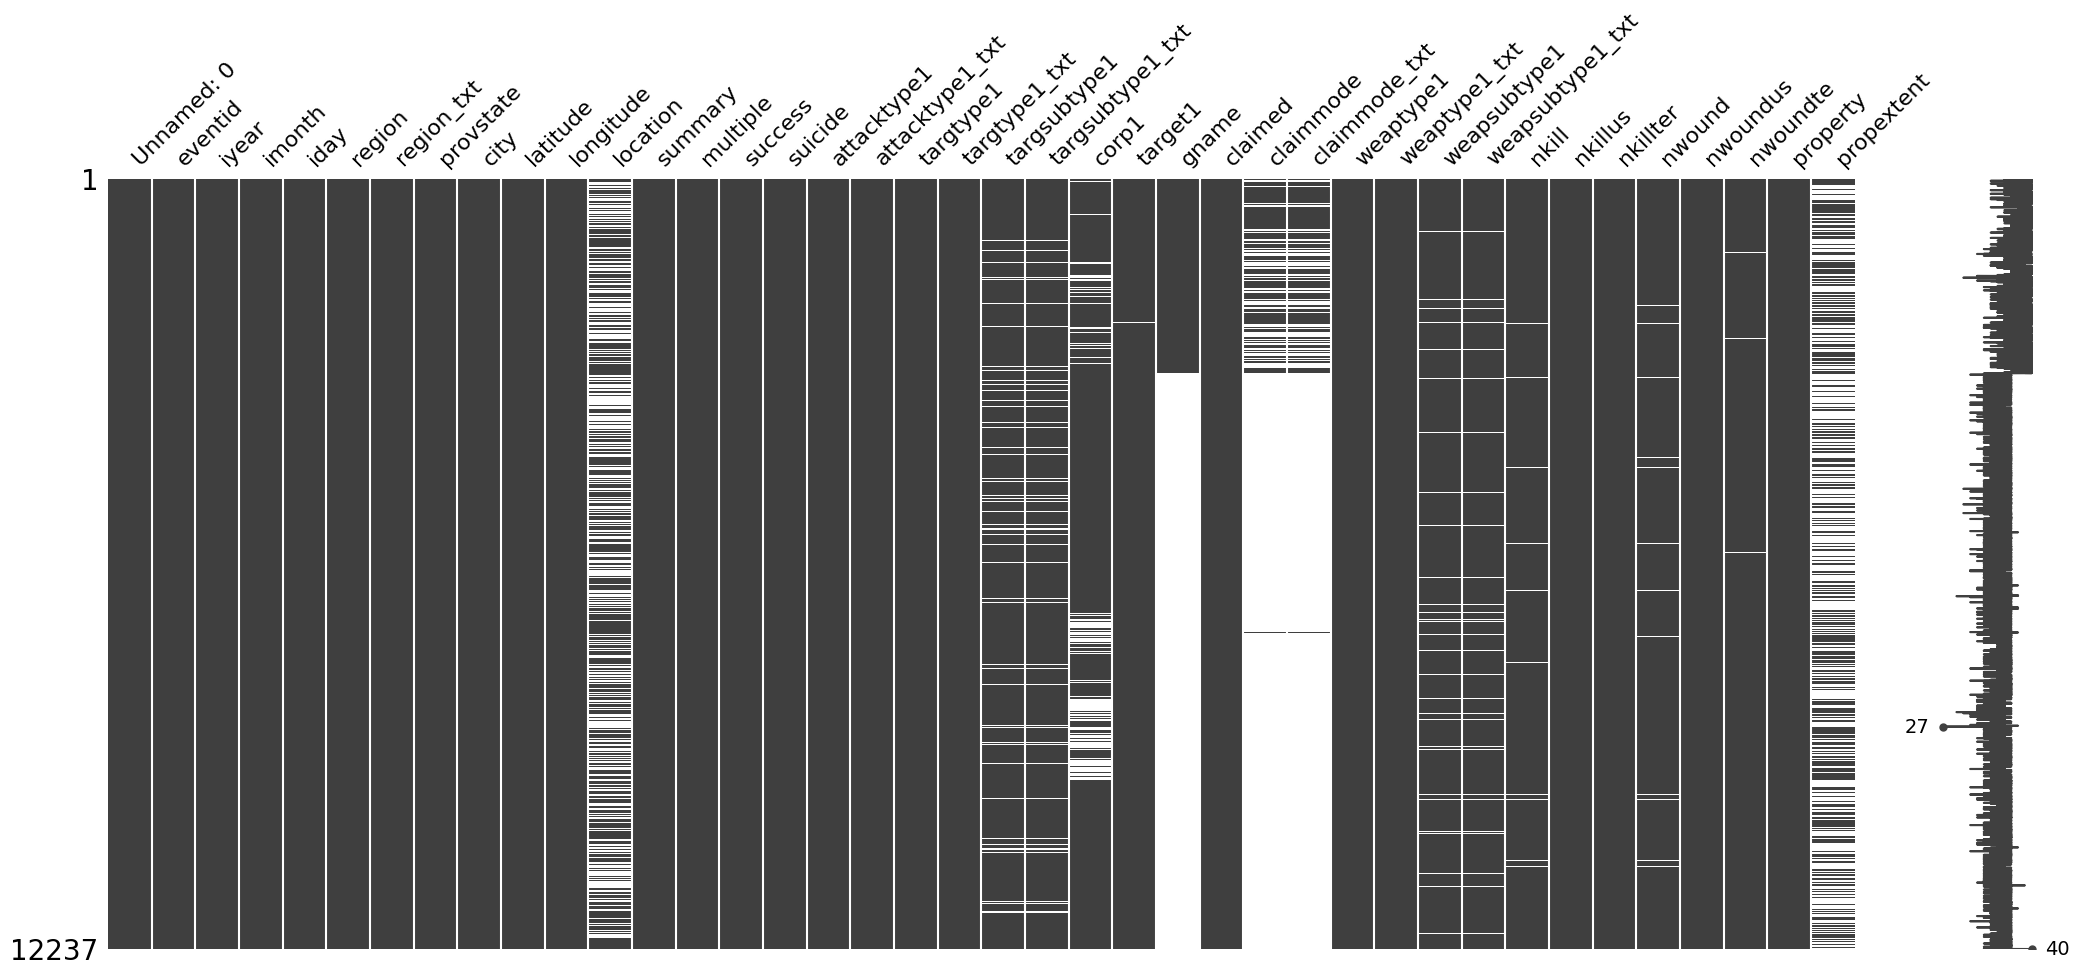

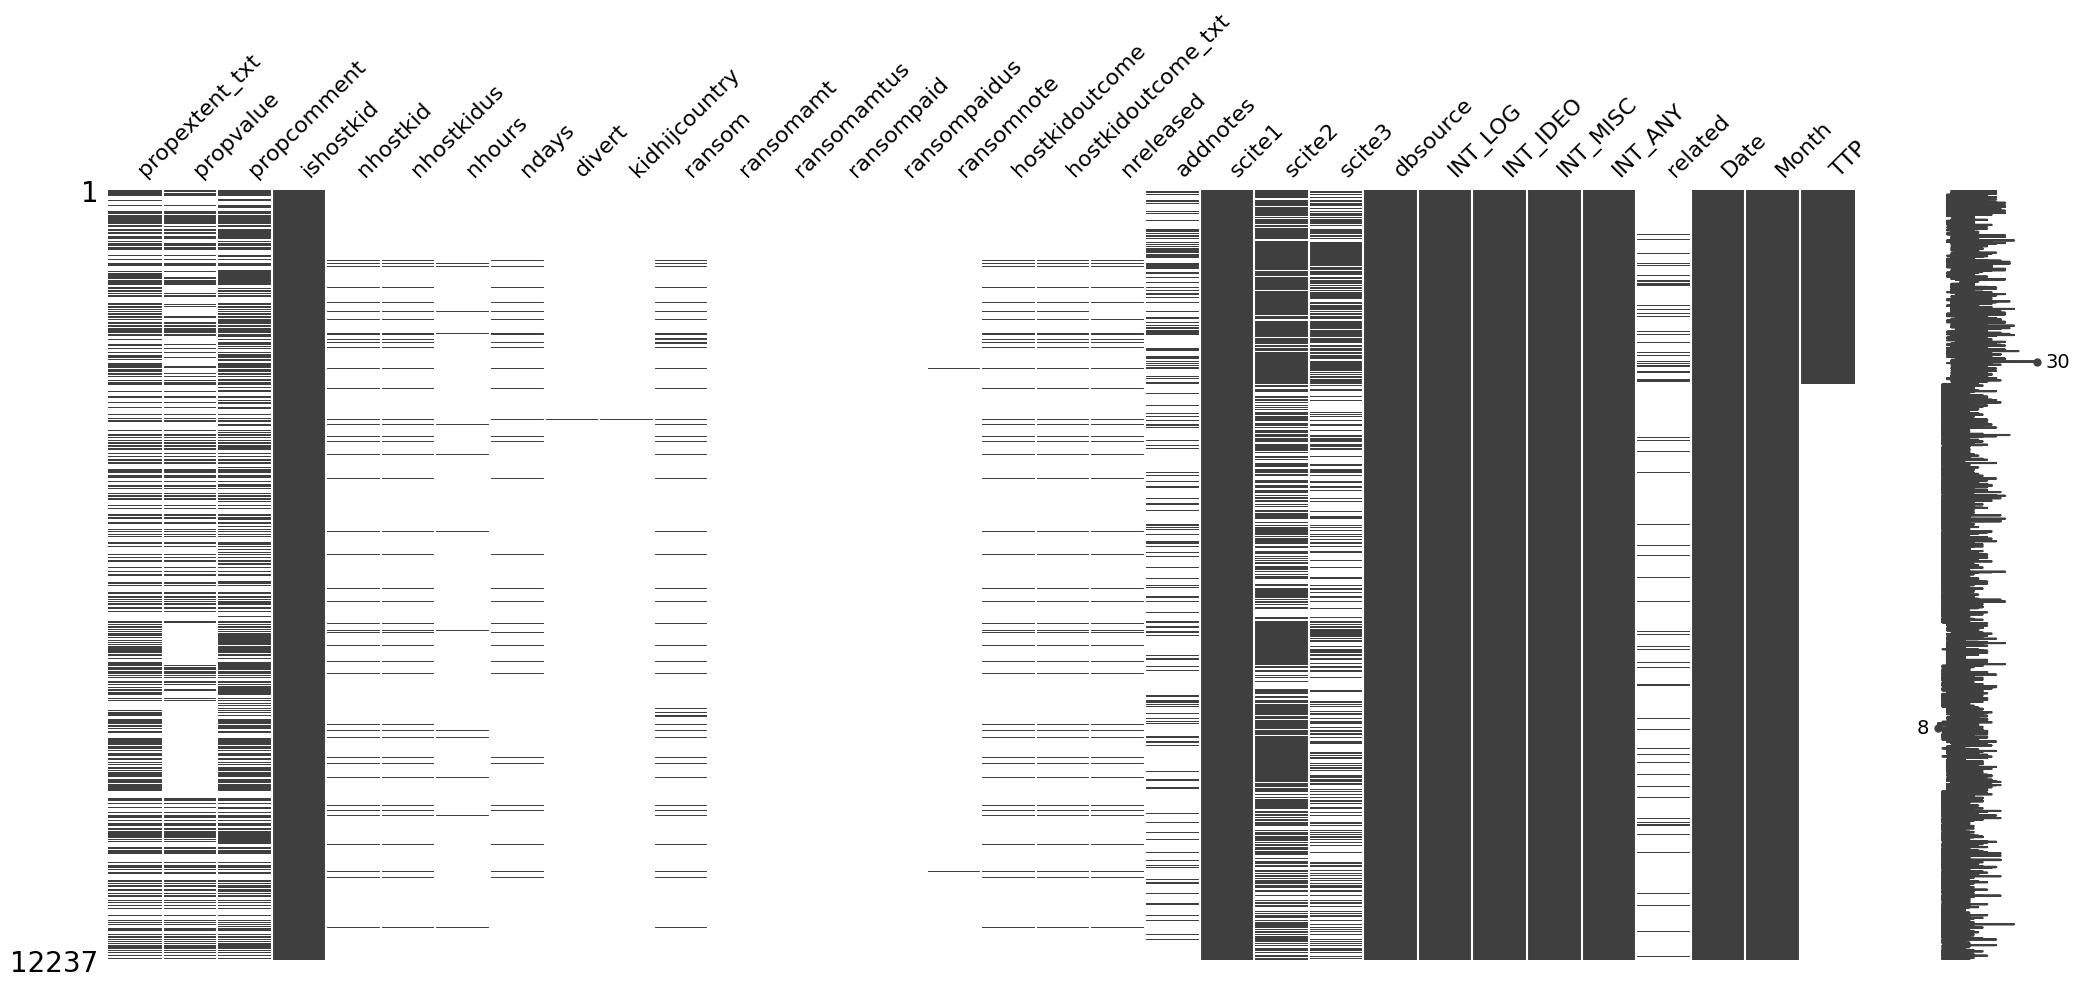

In [77]:
# Visualize missing data
print(msno.matrix(df.iloc[:, :40]))
print(msno.matrix(df.iloc[:, 40:]))

Select columns (28 predictors and 1 reponse)

In [78]:
df = df[[
    'iyear', 'imonth', 'iday', 'provstate', 'city', 'latitude', 'longitude',
    'multiple', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
    'targsubtype1_txt', 'corp1', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
    'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
    'ishostkid']]

Evaluate missing data in the new subset of data we with to use for prediction

In [79]:
df.isnull().sum(axis=0)

iyear                  0
imonth                 0
iday                   0
provstate              0
city                   9
latitude               0
longitude              0
multiple               0
success                0
suicide                0
attacktype1_txt        0
targtype1_txt          0
targsubtype1_txt     851
corp1               1742
gname               9148
weaptype1_txt          0
weapsubtype1_txt     468
nkill                210
nkillus                6
nkillter              33
nwound               328
nwoundus              11
nwoundte             115
property               0
ishostkid              0
dtype: int64

<Axes: >

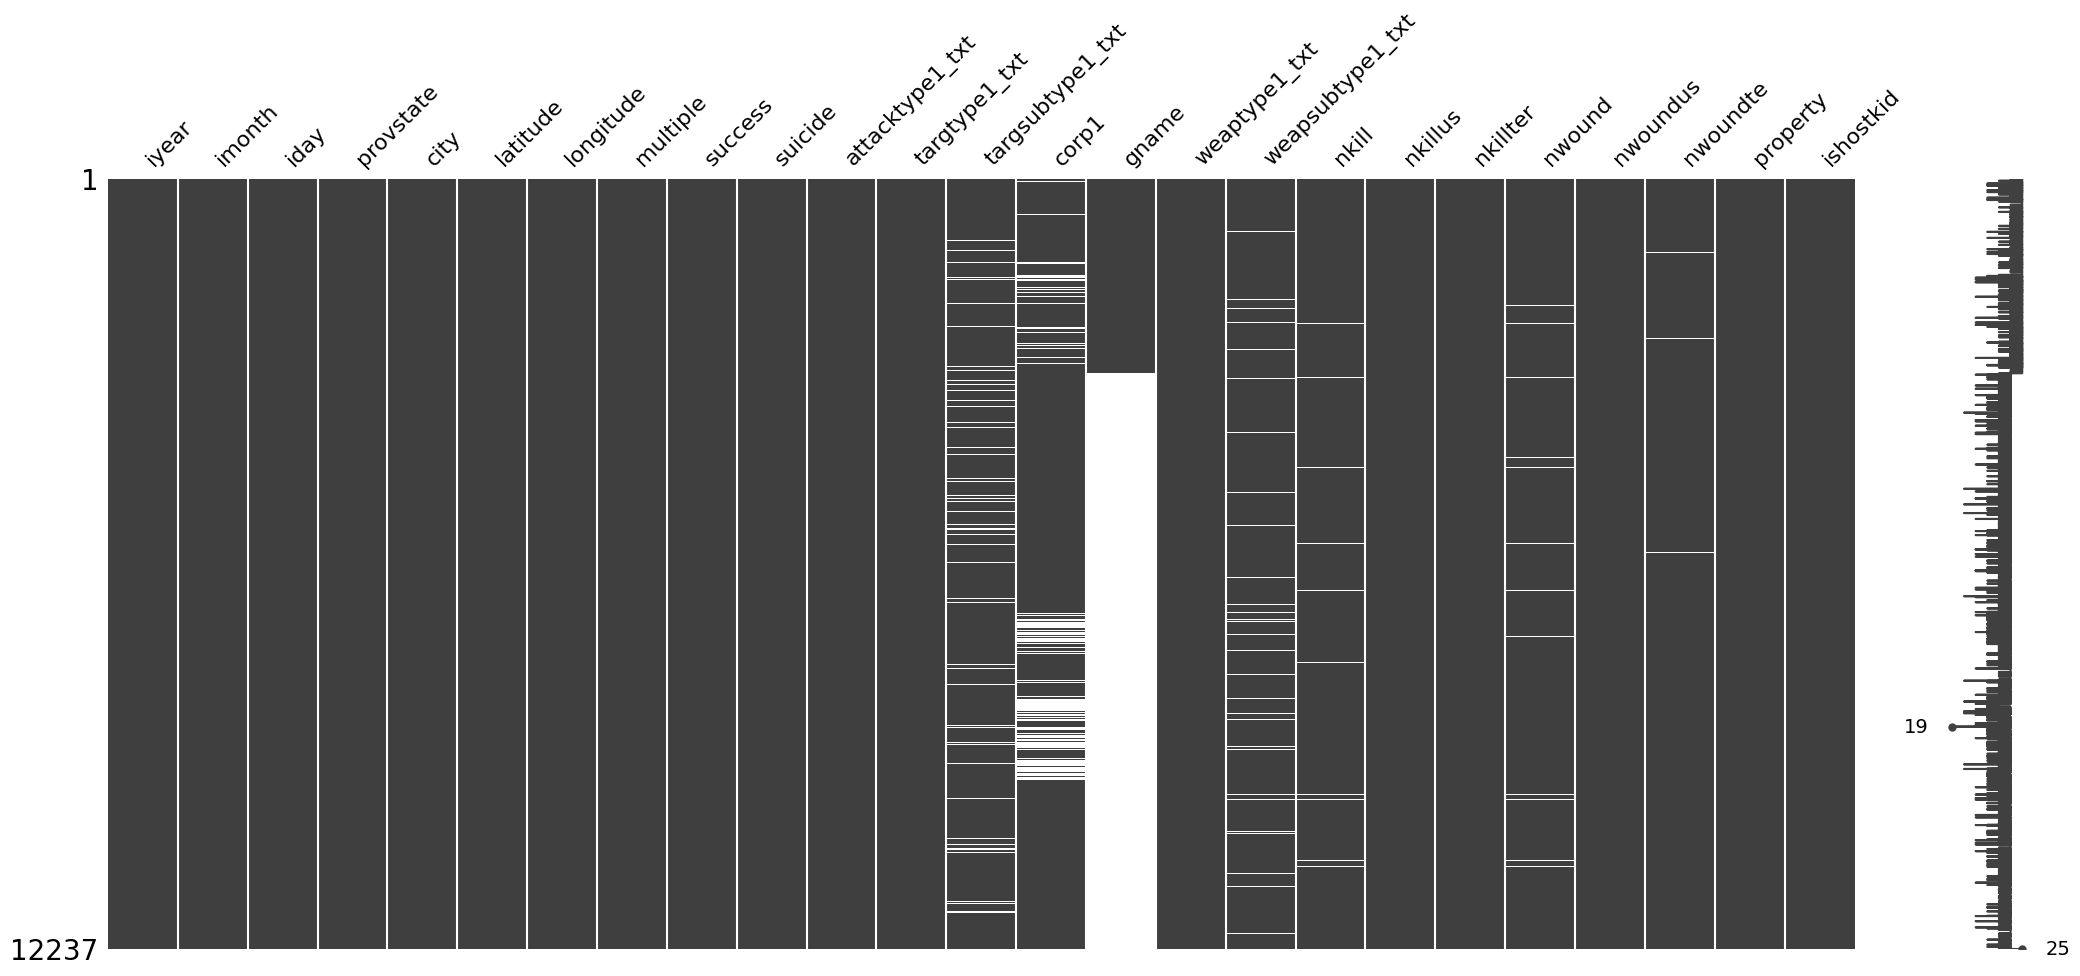

In [80]:
msno.matrix(df)

In [81]:
df['city'].fillna('unknown', inplace=True)
df['targsubtype1_txt'].fillna('unknown', inplace=True)
df['corp1'].fillna('unknown', inplace=True)
df['weapsubtype1_txt'].fillna('Uknown Weapon Type', inplace=True)

In [82]:
df_known = df[~df['gname'].isna()].reset_index(drop=True)
df_known

iyear  imonth  iday                            provstate   
0      2011      12     8                   Khyber Pakhtunkhwa  \
1      2012       8     6                   Khyber Pakhtunkhwa   
2      2014       4    18  Federally Administered Tribal Areas   
3      2012       2    24                   Khyber Pakhtunkhwa   
4      2014       1    16  Federally Administered Tribal Areas   
...     ...     ...   ...                                  ...   
3084   2013       8     5                          Balochistan   
3085   2015      11     1                          Balochistan   
3086   2013       8     5                          Balochistan   
3087   2013      11    20                          Balochistan   
3088   2013       5     2                          Balochistan   

                city   latitude  longitude  multiple  success  suicide   
0             Jamrud  34.002579  71.382477         0        1        0  \
1             Jamrud  34.002577  71.382480         0        1        0   
2        Landi Kotal  34.110324  71.163807         0        1        0   
3            Kotwali  34.004299  71.544830         0        1        1   
4        Landi Kotal  34.110324  71.163807         0        1        0   
...              ...        ...        ...       ...      ...      ...   
3084  Machh district  29.880988  67.337753         1        1        0   
3085           Dasht  29.798417  66.846910         0        1        0   
3086  Machh district  29.880988  67.337753         1        1        0   
3087          Quetta  30.200820  66.994352         1        1        0   
3088      Hakeemabad  27.508215  66.427150         0        1        0   

        attacktype1_txt                targtype1_txt   
0         Assassination         Government (General)  \
1         Armed Assault                     Military   
2     Bombing/Explosion                     Military   
3     Bombing/Explosion                       Police   
4     Bombing/Explosion                     Military   
...                 ...                          ...   
3084  Bombing/Explosion                    Utilities   
3085  Bombing/Explosion               Transportation   
3086  Bombing/Explosion                    Utilities   
3087  Bombing/Explosion                       Police   
3088      Armed Assault  Private Citizens & Property   

                                       targsubtype1_txt   
0     Government Personnel (excluding police, military)  \
1                                                  NATO   
2         Military Barracks/Base/Headquarters/Checkpost   
3       Police Building (headquarters, station, school)   
4         Military Barracks/Base/Headquarters/Checkpost   
...                                                 ...   
3084                                        Electricity   
3085                         Train/Train Tracks/Trolley   
3086                                        Electricity   
3087    Police Building (headquarters, station, school)   
3088                       Political Party Member/Rally   

                                                  corp1   
0            Human Rights Commission of Pakistan (HRCP)  \
1     North Atlantic Treaty Organization (NATO): Int...   
2                                   Frontier Corps (FC)   
3                                      Pakistani Police   
4                                            Khassadars   
...                                                 ...   
3084             Quetta Electric Supply Company (QESCO)   
3085                                  Pakistan Railways   
3086             Quetta Electric Supply Company (QESCO)   
3087                                   Pakistani Police   
3088                   Balochistan National Party (BNP)   

                         gname weaptype1_txt   
0      Abdullah Azzam Brigades      Firearms  \
1      Abdullah Azzam Brigades      Firearms   
2      Abdullah Azzam Brigades    Explosives   
3      Abdullah Azzam Brigades    Explosi

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Khyber Pakhtunkhwa'),
  Text(1, 0, 'Federally Administered Tribal Areas'),
  Text(2, 0, 'Sindh'),
  Text(3, 0, 'Balochistan'),
  Text(4, 0, 'Punjab'),
  Text(5, 0, 'Islamabad Capital Territory'),
  Text(6, 0, 'Gilgit-Baltistan'),
  Text(7, 0, 'Azad Kashmir')])

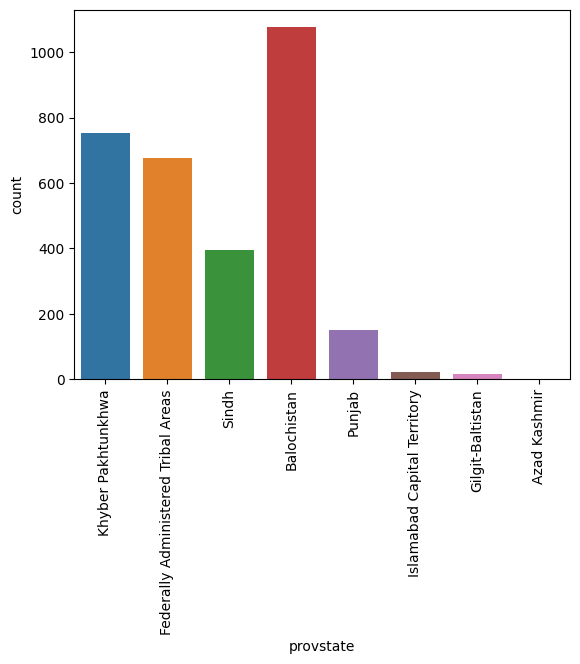

In [88]:
sns.countplot(df_known, x='provstate')
plt.xticks(rotation=90)

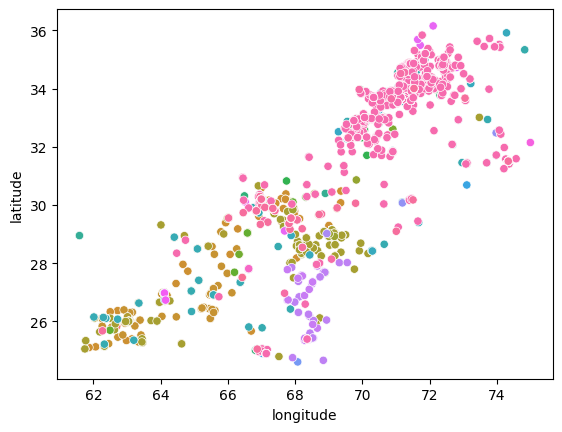

In [94]:
sns.scatterplot(df_known, x='longitude', y='latitude', hue='gname')
plt.legend().remove()

In [93]:
# Create a map centered on South Asia
m = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add scatterplot markers to the map
for index, row in df_known.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        fill=True,
                        #fill_color='blue',
                        fill_opacity=0.6,
                        fill_color=row['gname'],
                        popup=row['gname']).add_to(m)

# Display the map
m